In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [11]:
!pip install nltk

Veri Setinin Yüklenmesi

In [25]:
data=pd.read_csv("emotion_dataset.csv")

In [26]:
data

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  34792 non-null  int64 
 1   Emotion     34792 non-null  object
 2   Text        34792 non-null  object
 3   Clean_Text  34326 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [29]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('Clean_Text', axis=1, inplace=True)
data.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [31]:
data.rename(columns={"Emotion":"labels"},inplace=True)
data.head()

,labels,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [33]:
a=data['labels'].value_counts()

In [34]:
labels=["joy","sadness","fear","anger","surprise","neutral","disgust","shame"]

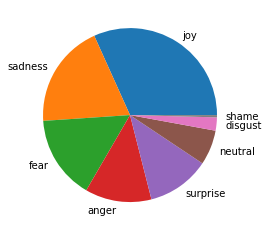

In [35]:
plt.pie(a,labels=labels)
plt.show()

Data Preprocess İşlemleri

Metnin Küçük Harfe Çevrilmesi

In [37]:
data['Text']=data["Text"].apply(lambda x: ' '.join(x.lower() for x in x.split()))
data["labels"]=data["labels"].apply(lambda x: ' '.join(x.lower() for x in x.split()))
data

,labels,Text
0,neutral,why ?
1,joy,sage act upgrade on my to do list for tommorow.
2,sadness,on the way to my homegirl baby funeral!!! man ...
3,joy,such an eye ! the true hazel eye-and so brilli...
4,joy,@iluvmiasantos ugh babe.. hugggzzz for u .! ba...
...,...,...
34787,surprise,@michelgw have you gift! hope you like it! it'...
34788,joy,the world didnt give it to me..so the world mo...
34789,anger,a man robbed me today .
34790,fear,"youu call it jealousy, i call it of #losing yo..."


Noktalama İşaretlerinin Kaldırılması

In [38]:
data["labels"]=data["labels"].str.replace("[^\w\s]","")
data["Text"]=data["Text"].str.replace("[^\w\s]","")
data

,labels,Text
0,neutral,why
1,joy,sage act upgrade on my to do list for tommorow
2,sadness,on the way to my homegirl baby funeral man i h...
3,joy,such an eye the true hazel eyeand so brillian...
4,joy,iluvmiasantos ugh babe hugggzzz for u babe na...
...,...,...
34787,surprise,michelgw have you gift hope you like it its ha...
34788,joy,the world didnt give it to meso the world most...
34789,anger,a man robbed me today
34790,fear,youu call it jealousy i call it of losing you


Metinde Bulunan Sayıların Silinmesi